In [355]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

### 配色方案

In [278]:
colorList = ['#C1232B','#B5C334','#FCCE10','#E87C25','#27727B',
             '#FE8463','#9BCA63','#FAD860','#F3A43B','#60C0DD',
             '#D7504B','#C6E579','#F4E001','#F0805A','#26C0C0']

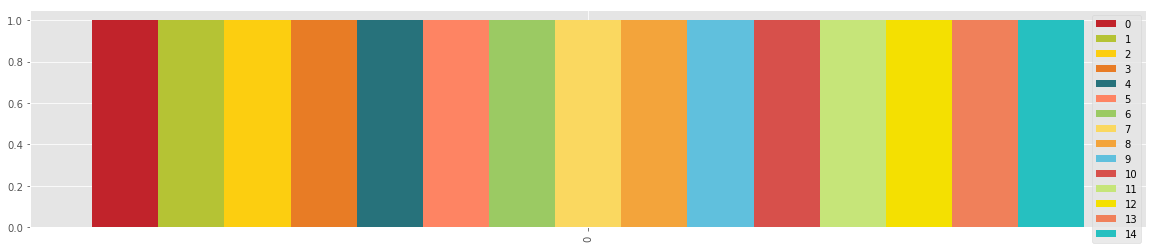

In [313]:
data = pd.DataFrame(np.random.randint(1,2,15).reshape(1,15))
data.plot(kind='bar',width =4,color =colorList,figsize=(20,4))

### 饼图

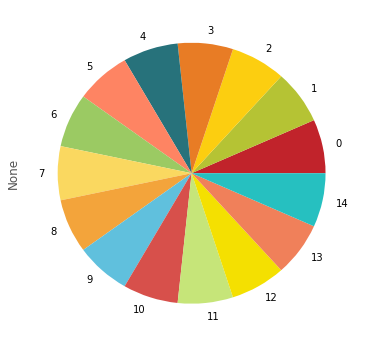

In [312]:
data1 = pd.Series(np.random.randint(1,2,15))
data1.plot.pie(figsize=(6,6),colors =colorList)  # 用的是colors 而非color

### 绘制折线图

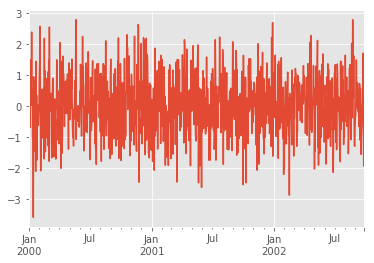

In [6]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.plot()

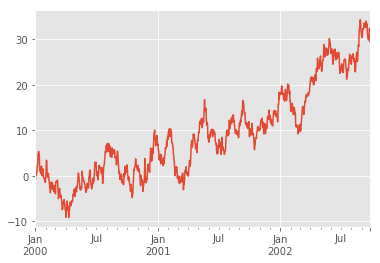

In [7]:
ts.cumsum().plot()

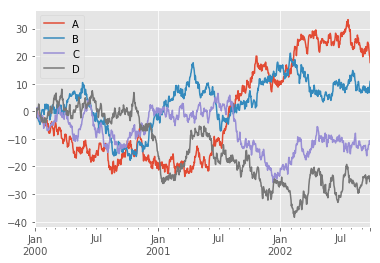

In [8]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()  # 产生画布
df.plot()

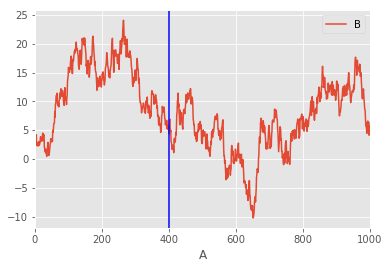

In [38]:
#采用标准正太分布随机数
df3 = pd.DataFrame(np.random.randn(1000,2), columns = list('BC')).cumsum()
# 添加计数列  pd.Series(list(range(len(df3))))
df3['A'] = pd.Series(list(range(1,len(df3)+1)))
plt.rc('figure',figsize = (6,4))
df3.plot(x = 'A',y ='B')
plt.axvline(400,color ='b')

###  柱状图 条形图
- 柱状图和value_counts() 一起用效果很好
- value_counts().plot(kind='bar')

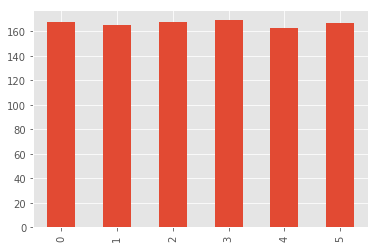

In [301]:
#生成0-3间的随机数
# 柱状图
df4 = pd.Series(np.random.randint(0,6,1000))   # 不应该用密度图
# df4.plot.hist(align='mid',figsize=(7,4))
# df4.to_frame().reset_index(drop =False)
df4.value_counts().sort_index().plot(kind ='bar')

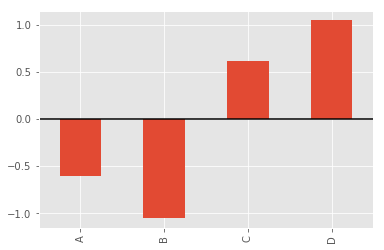

In [39]:
# 一个样本四列
plt.figure()
df.iloc[5].plot(kind ='bar')
# 增加辅助先
plt.axhline(0,color ='k')

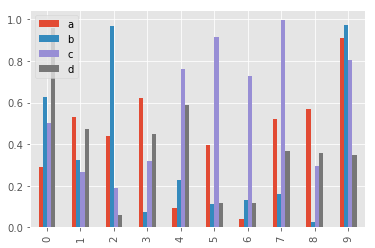

In [40]:
df2 = pd.DataFrame(np.random.rand(10,4),columns=list('abcd'))
# 两种方式一样
#将样本（索引） 作为x轴
df2.plot.bar()

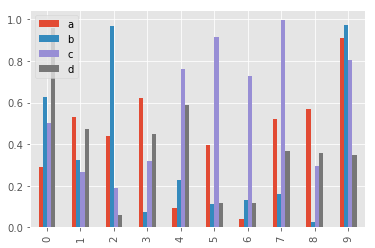

In [41]:
df2.plot(kind ='bar')

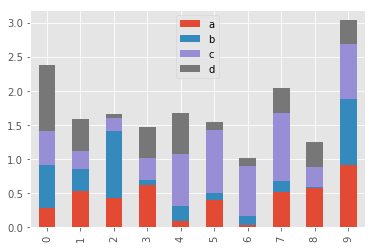

In [42]:
df2.plot.bar(stacked = True)

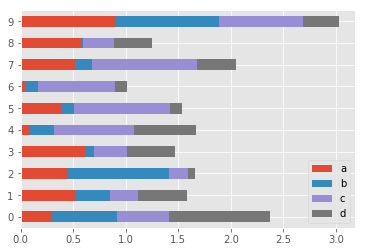

In [316]:
#水平 条形图
df2.plot.barh(stacked =True)
# 定义y轴刻度

#条形图可以画出旋风图的效果

###  直方图  密度图

In [342]:
df5 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b':np.random.randn(1000),'c': np.random.randn(1000)-1 },columns =list('abc'))
df5.head()

,a,b,c
0,0.191897,0.240296,-0.580587
1,0.224752,1.018403,-0.052878
2,1.973957,-0.311936,0.321503
3,1.610363,-0.075249,-0.845076
4,-0.531618,0.776648,0.121747


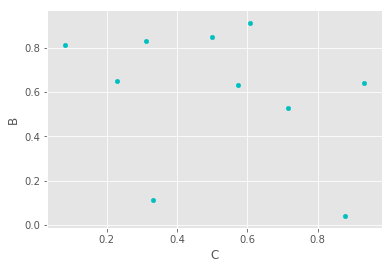

In [204]:
df6.plot.scatter(x= 'C',y ='B',c ='c')  
# c 设置颜色？

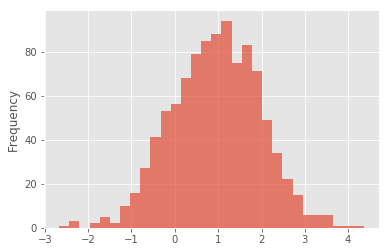

In [343]:
#直方图 也叫密度图  查看单变量的数值分布情况  （连续型变量）
plt.figure()
# df4.plot.hist(alpha =0.2)
df5.a.plot.hist(alpha =0.7,bins = 30)  # 默认10区间
# pl.set_yticks(range(0,400,10))  设置y轴刻度失败

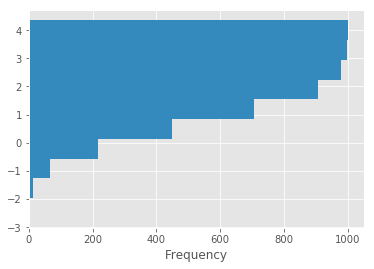

In [344]:
# 横向的直方图
df5['a'].plot.hist(orientation = 'horizontal',cumulative = True )
#同样效果
df5['a'].plot(kind = 'hist',orientation = 'horizontal',cumulative = True )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192CD98F0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000192CDB85F98>]], dtype=object)

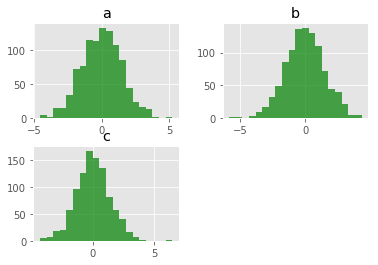

In [345]:
#diff()差分完 第一个是缺失值
df5['a'].diff()
df5.diff().hist(color ='g',alpha= 0.7,bins =20)

#### 直方图 根据第二个因子变量切分

([array([  12.,   19.,   18.,   52.,  107.,   75.,   47.,   86.,   72.,    9.]),
  array([  23.,   41.,   37.,  115.,  205.,  138.,   97.,  175.,  141.,   28.])],
 array([-25.78455709, -22.55587638, -19.32719568, -16.09851498,
        -12.86983427,  -9.64115357,  -6.41247286,  -3.18379216,
          0.04488854,   3.27356925,   6.50224995]),
 <a list of 2 Lists of Patches objects>)

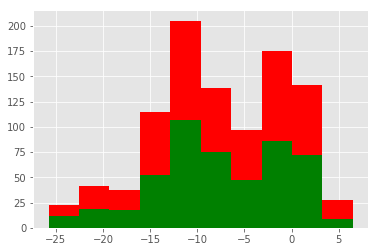

In [349]:
df['X'] = pd.Series(np.random.choice(['A','B'],len(df)),index = df.index)
# 直方图
plt.hist(x = [df[df['X']=='A']['C'],df[df['X']=='B']['C']], stacked = True,color = ['g','r'],label =['A_type','B_type'])

In [335]:
df2['X'] = pd.Series(np.random.choice(['A','B'],len(df2)))
df2

,a,b,c,d,X
0,0.289460,0.625948,0.499849,0.956876,A
1,0.528166,0.322227,0.264161,0.472739,B
2,0.437182,0.970003,0.188698,0.059767,A
3,0.622477,0.076156,0.318001,0.448767,A
4,0.092169,0.226159,0.763273,0.589150,B
5,0.394848,0.112621,0.913436,0.118965,B
6,0.038795,0.130512,0.728403,0.118887,B
7,0.522295,0.160365,0.994807,0.367584,A
8,0.570316,0.023848,0.294643,0.358121,A
9,0.912160,0.970665,0.803643,0.346102,A


### 箱形图

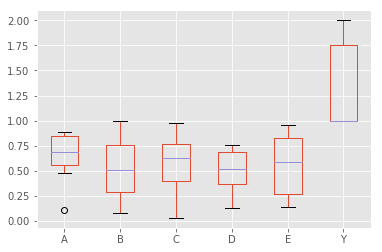

In [218]:
df6 = pd.DataFrame(np.random.rand(10,5),columns =list('ABCDE'))
# df6['X'] =pd.Series(list('AAABBABABA'))
df6['X'] = pd.Series(np.random.choice(['A','B'],10))
df6['Y'] = pd.Series(np.random.choice([1,2],10))
df6.plot(kind='box')
# 效果一致
# df6.plot.box()
# df6.boxplot()  # 用boxplot()  也是可以的

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000192C73949E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000192C7404550>], dtype=object)

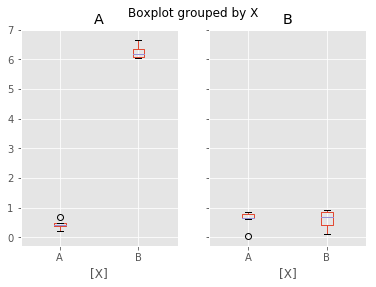

In [193]:
# boxplot() 可以实现按照第三个维度因子变量映射   分箱操作
# 数字列名  不好取得 使用重命名
# df6.rename(columns={'C':1})
df6.rename(columns={1:'C'})
df6.loc[df6['X'] =='B','A']  += 3 

df6[['A','B','X']].boxplot(by = 'X')

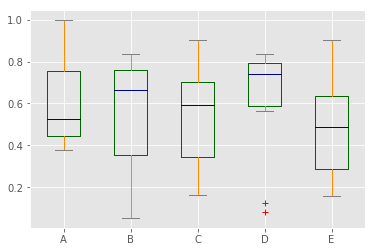

In [127]:
color = dict(boxes ='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df6.plot.box(color = color , sym = 'r+')  # 异常值用红色 + 好表示

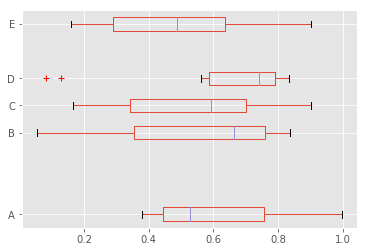

In [132]:
# 横向展示 vert=False  
# 自定义 箱线图位置 positions 
df6.plot.box(vert=False,positions=[1,4,5,6,8],sym = 'r+')

### 散点图  

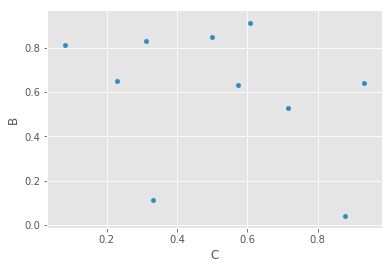

In [201]:
df6.plot(kind = 'scatter', x= 'C',y ='B')
# df6.plot.scatter(x= 'C',y ='B')

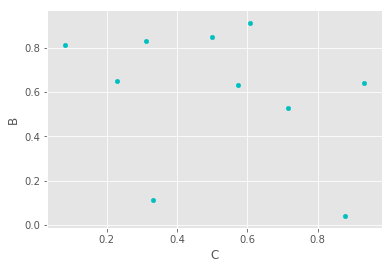

In [204]:
df6.plot.scatter(x= 'C',y ='B',c ='c')  
# c 设置颜色？

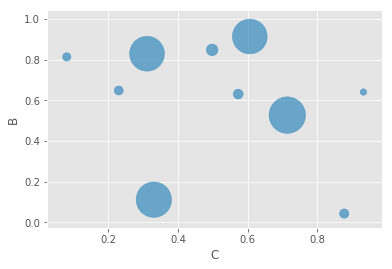

In [213]:
# 气泡图  透明度 alpha
# df6.plot.scatter(x='B',y = 'C',s =df6['A']*200)
df6.plot(kind = 'scatter', x= 'C',y ='B',s =df6['A']*200, alpha =0.7)

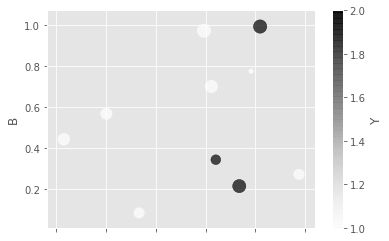

In [219]:
# c 设置渐变颜色  参数根据连续变量的数值反映颜色
df6.plot(kind = 'scatter', x= 'C',y ='B',c ='Y' ,s =df6['A']*200, alpha =0.7)

A
A


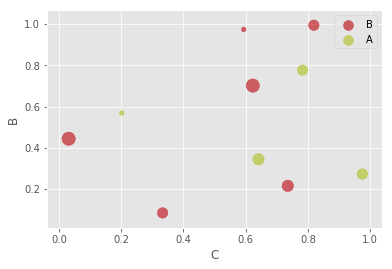

In [277]:
# 颜色映射
# ax = plt.figure()
f,ax=plt.subplots(1,1,figsize=(6,4))
# 因子数量列表
X = list(df6['X'].unique())
for i in range(len(X)):
    print(type)
    data = df6.loc[df6['X'] == X[i],:]
    data.plot(kind = 'scatter', x= 'C',y ='B',s =df6['A']*200,color = colorList[i], alpha =0.7,label=X[i], ax = ax)


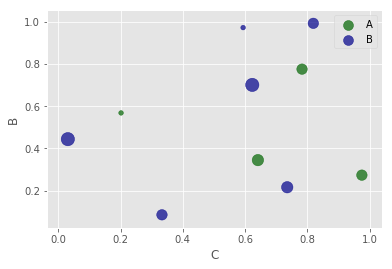

In [314]:
# ax = plt.figure()
# Pandas 画图 散点图 没办法将颜色映射到 因子变量上
data = df6.loc[df6['X'] =='A',:]
data1 = df6.loc[df6['X'] =='B',:]
ax = data.plot(kind = 'scatter', x= 'C',y ='B',color ='DarkGreen',s =df6['A']*200, label ='A',alpha =0.7)
data1.plot(kind = 'scatter', x= 'C',y ='B',color ='DarkBlue',s =df6['A']*200, label ='B',alpha =0.7,ax=ax)

In [ ]:
# ax = plt.figure()
# Pandas 画图 散点图 没办法将颜色映射到 因子变量上
data =[df6.loc[df6['X'] =='A',:],df6.loc[df6['X'] =='B',:]]
plt.plot(kind = 'scatter', x= 'C',y ='B',color ={data[0]:'DarkGreen',data[1]:'DarkBlue'},s =df6['A']*200, label ='A',alpha =0.7)


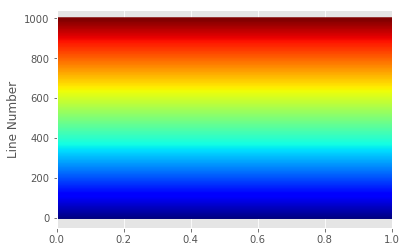

In [273]:
# 产生 1000个不同色的颜色
import matplotlib.pyplot as plt

from matplotlib import cm
from numpy import linspace

start = 0.0
stop = 1.0
number_of_lines= 1000
cm_subsection = linspace(start, stop, number_of_lines) 

colors = [ cm.jet(x) for x in cm_subsection ]

for i, color in enumerate(colors):
    plt.axhline(i, color=color)

plt.ylabel('Line Number')
plt.show()

### 面积图

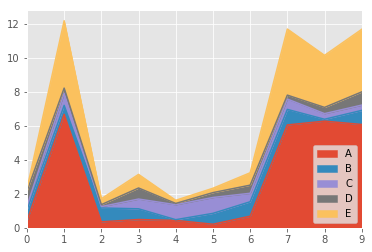

In [198]:
df6.plot(kind ='area') #堆积面积图
# df6.plot.area()

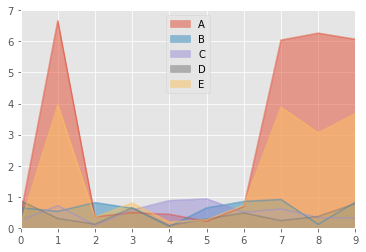

In [199]:
df6.plot(kind ='area', stacked = False)

### 其他

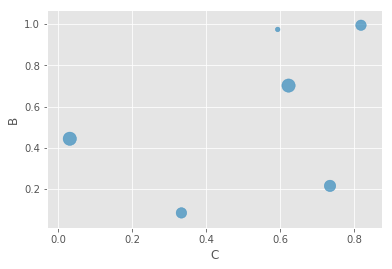

In [259]:
data1.plot(kind = 'scatter', x= 'C',y ='B',s =df6['A']*200, alpha =0.7)

data : DataFrame
- x : label or position, default None  坐标轴数据
- y : label or position, default None


   - kind : str
    + ‘line’ : line plot (default)
    + ‘bar’ : vertical bar plot
    + ‘barh’ : horizontal bar plot
    + ‘hist’ : histogram
    + ‘box’ : boxplot
    + ‘kde’ : Kernel Density Estimation plot
    + ‘density’ : same as ‘kde’
    + ‘area’ : area plot
    + ‘pie’ : pie plot
    + ‘scatter’ : scatter plot
    + ‘hexbin’ : hexbin plot

- ax : matplotlib axes object, default None

subplots : boolean, default False

Make separate subplots for each column

- sharex : True 共享坐标轴
- sharey : False
- figsize : a 图片大小 (width, height) in inches

use_index : boolean, default True

Use index as ticks for x axis

- title : 标题  subplot 时是 list 对应每个子标题
- grid : boolean, default None (matlab style default)
- legend : 图列 False/True/’reverse’

- logx  / logy / loglog :  default False  对x y 进行log缩放

- xticks / yticks: x/y 的显示刻度 list -- sequence

- xlim/ylim  : 2-tuple/list

rot : int, default None

Rotation for ticks (xticks for vertical, yticks for horizontal plots)

- fontsize :x /y 刻度大小 int, default None

colormap : str or matplotlib colormap object, default None

Colormap to select colors from. If string, load colormap with that name from matplotlib.

colorbar : boolean, optional

If True, plot colorbar (only relevant for ‘scatter’ and ‘hexbin’ plots)

position : float

Specify relative alignments for bar plot layout. From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)

table : boolean, Series or DataFrame, default False

If True, draw a table using the data in the DataFrame and the data will be transposed to meet matplotlib’s default layout. If a Series or DataFrame is passed, use passed data to draw a table.

yerr : DataFrame, Series, array-like, dict and str

See Plotting with Error Bars for detail.

xerr : same types as yerr.

stacked : boolean, default False in line and

bar plots, and True in area plot. If True, create stacked plot.

sort_columns : boolean, default False

Sort column names to determine plot ordering

secondary_y : boolean or sequence, default False

Whether to plot on the secondary y-axis If a list/tuple, which columns to plot on secondary y-axis

mark_right : boolean, default True

When using a secondary_y axis, automatically mark the column labels with “(right)” in the legend

kwds : keywords

Options to pass to matplotlib plotting method

In [150]:
np.random.choice(range(10),20)

array([3, 4, 1, 5, 1, 8, 8, 7, 3, 5, 8, 6, 4, 9, 5, 9, 2, 6, 7, 8])

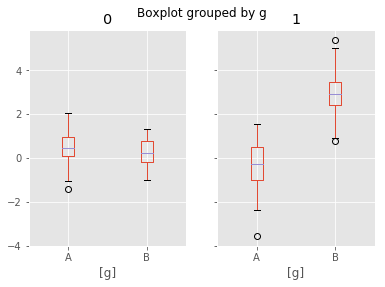

In [186]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')


In [188]:
df_box.columns

Index([0, 1, 'g'], dtype='object')

In [189]:
df_box.1

SyntaxError: invalid syntax (<ipython-input-189-2bd1e037036a>, line 1)

In [98]:
from rpy2.robjects import r,pandas2ri
pandas2ri.activate()
r.data('iris')
r['iris'].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


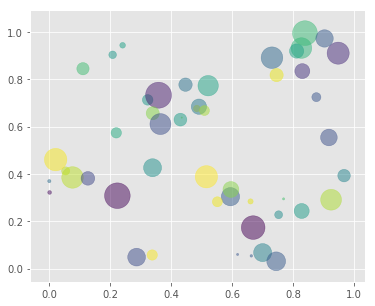

In [363]:
import numpy as np
import matplotlib.pyplot as plt

pl, ax = plt.subplots(1,1,figsize=(6,5))
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()


In [223]:
colors = np.random.rand(N)
colors

array([ 0.71196219,  0.35500083,  0.02463633,  0.69351252,  0.42121194,
        0.85834944,  0.57507355,  0.94006236,  0.88025552,  0.45814503,
        0.01731007,  0.06865464,  0.32060802,  0.59230189,  0.61005244,
        0.5124275 ,  0.14475646,  0.87680869,  0.73823518,  0.37332038,
        0.82868638,  0.09023954,  0.06400322,  0.50589695,  0.93342671,
        0.14896192,  0.56947879,  0.05974865,  0.16927793,  0.06902836,
        0.90602245,  0.44741006,  0.1063852 ,  0.66525978,  0.50227338,
        0.40920638,  0.72799347,  0.17209041,  0.38446089,  0.26700114,
        0.30822087,  0.1773028 ,  0.48255848,  0.6297172 ,  0.05955332,
        0.19688727,  0.27920844,  0.70782061,  0.32742909,  0.42529404])

In [99]:
r_dataframe = pandas2ri.py2ri(df4)
print(type(r_dataframe))
print(r_dataframe)

<class 'rpy2.robjects.vectors.DataFrame'>
               a            b             c

0    1.757572914 -0.539945516 -0.7834776967

1    1.289003749  0.466338214 -0.6677392787

2    1.223152301  0.537109488 -0.4745224091

3    1.213809321  0.893071404 -0.9416816317

4    0.146262870 -0.505921917  0.8716591780

5   -0.092962748  0.554650419 -1.1584285424

6    0.657932000  0.293070685 -1.1322858863

7    1.237707124 -0.306908500 -1.1274276496

8    0.582806190  1.415782826  0.6321434312

9    3.430331671  0.654190562 -1.2578241527

10   2.147990516 -1.278295815  0.1960593692

11   1.150562066  0.947061945 -1.5118875344

12   0.586736798 -0.060714726 -2.2103728337

13  -0.027812077  1.518292606 -1.9440750852

14   0.712815039  1.060294066 -1.4722301722

15   1.727257733  0.844521226 -2.1627369226

16   1.016183369 -0.108031640  0.4453005696

17   0.525514057 -0.748604829 -1.5804685790

18   1.804521998  1.352241946 -1.1745390042

19   1.974598474 -1.099886576 -1.3320618381

20   1.551210

In [100]:
plot.hist??

Object `plot.hist` not found.


In [101]:

plot = plt.figure(figszie= (12,6))
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

plt.ylim(-1.25,+1.25)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'figszie'

### 图片保存

In [364]:
pl.savefig("plot.png", format ='png', dpi = 80, bbox_inches ='tight',transparent = False )